# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
# df = pd.read_csv('UTAMA-NO-IMPUTATION-AGUST-SEPT-OKT.csv', encoding='unicode_escape')
df = pd.read_csv('UTAMA-IMPUTATION-AGUST-SEPT-OKT.csv', encoding='unicode_escape')
# df = df.loc[(df!=0).any(axis=1)]

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
y = y.reshape(len(y),1)

In [ ]:
# df_BULAN = pd.read_csv('UTAMA-NO-IMPUTATION-NOV.csv', encoding='unicode_escape')
# df_BULAN = pd.read_csv('UTAMA-NO-IMPUTATION-DELETION-NOV.csv', encoding='unicode_escape')
df_BULAN = pd.read_csv('UTAMA-IMPUTATION-NOV.csv', encoding='unicode_escape')
X_BULAN_test = df_BULAN.iloc[:, :-1].values
y_BULAN_test = df_BULAN.iloc[:, -1].values

y_BULAN_test = y_BULAN_test.reshape(len(y_BULAN_test),1)
# print(y)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Imputasi

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [ ]:
kernels = ["rbf", "sigmoid", "linear"]
Cvalues = [0.1, 1, 10, 100, 1000]
gammaValues = [0.005, 0.01, 1, 1.5]
bestR2 = 0

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


for kernelFunction in kernels:
  for Cvalue in Cvalues:
    for gammaValue in gammaValues:
      regressor = SVR(kernel = kernelFunction, gamma = gammaValue, C = Cvalue)
      regressor.fit(X_train, y_train)

      y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))

      nowR2 = r2_score(y_test, y_pred)

      print(f"kernel = {kernelFunction} , C = {Cvalue} , Gamma = {gammaValue} , R2 = {nowR2}")

      if nowR2 > bestR2:
        bestR2 = nowR2
        bestKernels = kernelFunction
        bestCvalue = Cvalue
        bestGammaValue = gammaValue

print(f"Best -> R2 = {bestR2} , kernel = {bestKernels} , C = {bestCvalue} , Gamma = {bestGammaValue}")



kernel = rbf , C = 0.1 , Gamma = 0.005 , R2 = 0.9066621219678406
kernel = rbf , C = 0.1 , Gamma = 0.01 , R2 = 0.9338973687763202
kernel = rbf , C = 0.1 , Gamma = 1 , R2 = 0.8066532341417842
kernel = rbf , C = 0.1 , Gamma = 1.5 , R2 = 0.737040134356378
kernel = rbf , C = 1 , Gamma = 0.005 , R2 = 0.9393554669482277
kernel = rbf , C = 1 , Gamma = 0.01 , R2 = 0.9398391261168165
kernel = rbf , C = 1 , Gamma = 1 , R2 = 0.928329170447248
kernel = rbf , C = 1 , Gamma = 1.5 , R2 = 0.9160469588084986
kernel = rbf , C = 10 , Gamma = 0.005 , R2 = 0.9386705031390759
kernel = rbf , C = 10 , Gamma = 0.01 , R2 = 0.9386673361796635
kernel = rbf , C = 10 , Gamma = 1 , R2 = 0.9292153915033904
kernel = rbf , C = 10 , Gamma = 1.5 , R2 = 0.9168796827414503
kernel = rbf , C = 100 , Gamma = 0.005 , R2 = 0.9379043182168745
kernel = rbf , C = 100 , Gamma = 0.01 , R2 = 0.9374905665438762
kernel = rbf , C = 100 , Gamma = 1 , R2 = 0.9042245038286165
kernel = rbf , C = 100 , Gamma = 1.5 , R2 = 0.8737038541590808
ke

In [ ]:
regressor = SVR(kernel = "rbf", gamma = 0.01, C = 1)
regressor.fit(X_train, y_train)

y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
y_BULAN_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_BULAN_test)).reshape(-1,1))

# r2_score(y_BULAN_test, y_BULAN_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("R2 = ", r2_score(y_test, y_pred))
print("RMSE = ", mean_squared_error(y_test, y_pred, squared=False) )
print("MSE = ", mean_squared_error(y_test, y_pred) )
print("MAE = ", mean_absolute_error(y_test, y_pred) )

R2 =  0.9398391261168165
RMSE =  1.8766663924938038
MSE =  3.5218767487157074
MAE =  0.7456799599713063


In [ ]:
print("R2 = ", r2_score(y_BULAN_test, y_BULAN_pred))
print("RMSE = ", mean_squared_error(y_BULAN_test, y_BULAN_pred, squared=False) )
print("MSE = ", mean_squared_error(y_BULAN_test, y_BULAN_pred) )
print("MAE = ", mean_absolute_error(y_BULAN_test, y_BULAN_pred) )

R2 =  0.9558801680830611
RMSE =  2.055738952682684
MSE =  4.2260626415769
MAE =  0.7837254312144961


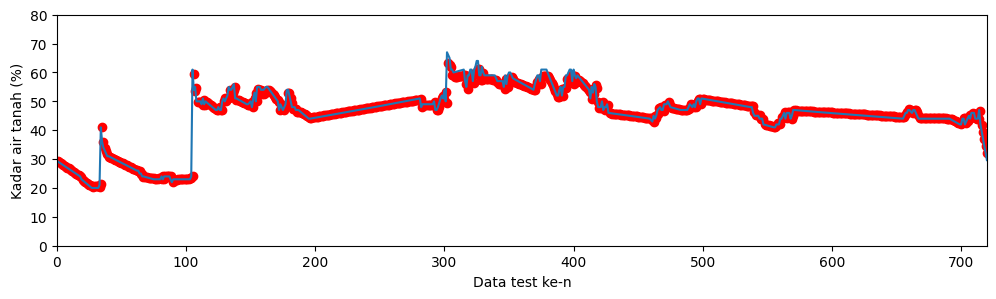

In [ ]:
data_x = list(range(1,len(y_BULAN_test)+1))
import matplotlib.pyplot as plt
jumlah_data_grafik = len(y_BULAN_test)
# jumlah_data_grafik = len(y_test)
plt.figure(figsize=(12, 3))

plt.axis((0,len(y_BULAN_test), 0,80))
plt.xlabel("Data test ke-n")
plt.ylabel("Kadar air tanah (%)")

plt.plot(data_x[:jumlah_data_grafik], y_BULAN_test[:jumlah_data_grafik])
plt.scatter(data_x[:jumlah_data_grafik], y_BULAN_pred[:jumlah_data_grafik], color='red')

# plt.scatter(y_pred, y_test)

plt.show()